In [40]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *

from nba_api.stats.endpoints import synergyplaytypes

box_DIR = "../data/box/"
img_DIR_T = "../data/images/teams/"

In [37]:
df12,df22,df32 = [],[],[]
for year in range(2013,2025):
    stats = leaguedashteamstats.LeagueDashTeamStats(
        season=get_ss(year),
        measure_type_detailed_defense="Advanced",
        season_type_all_star="Regular Season",
    )
    df11 = stats.get_data_frames()[0]
    df12.append(df11)
    stats = leaguedashteamstats.LeagueDashTeamStats(
        season=get_ss(year),
        measure_type_detailed_defense="Defense",
        season_type_all_star="Regular Season",
        per_mode_detailed="Per100Possessions",
    )
    df21 = stats.get_data_frames()[0]
    df22.append(df21)
    stats = synergyplaytypes.SynergyPlayTypes(
        league_id="00",
        per_mode_simple="PerGame",
        season=get_ss(year),
        season_type_all_star="Regular Season",
        player_or_team_abbreviation="T",
        type_grouping_nullable="Defensive",
        play_type_nullable="Transition",

    )
    df31 = stats.get_data_frames()[0]
    df32.append(df31)

years = list(range(2013,2025))
dfa = []
for i,year in enumerate(years):
    dfc1 = pd.merge(df12[i],df22[i],on=["TEAM_ID","TEAM_NAME"])
    dfc2 = pd.merge(dfc1,df32[i],on=["TEAM_ID","TEAM_NAME"])
    dfc2["Season"] = year + 1
    dfa.append(dfc2)
df1 = pd.concat(dfa)

df5 = df1.copy()
df5["OPP_FB_PCT"] = df5["OPP_PTS_FB"]/df5["DEF_RATING_y"]
df5["Season"] = df5["Season"].astype("category")

df5["url"]= img_DIR_T + df5["TEAM_NAME"] + ".png"

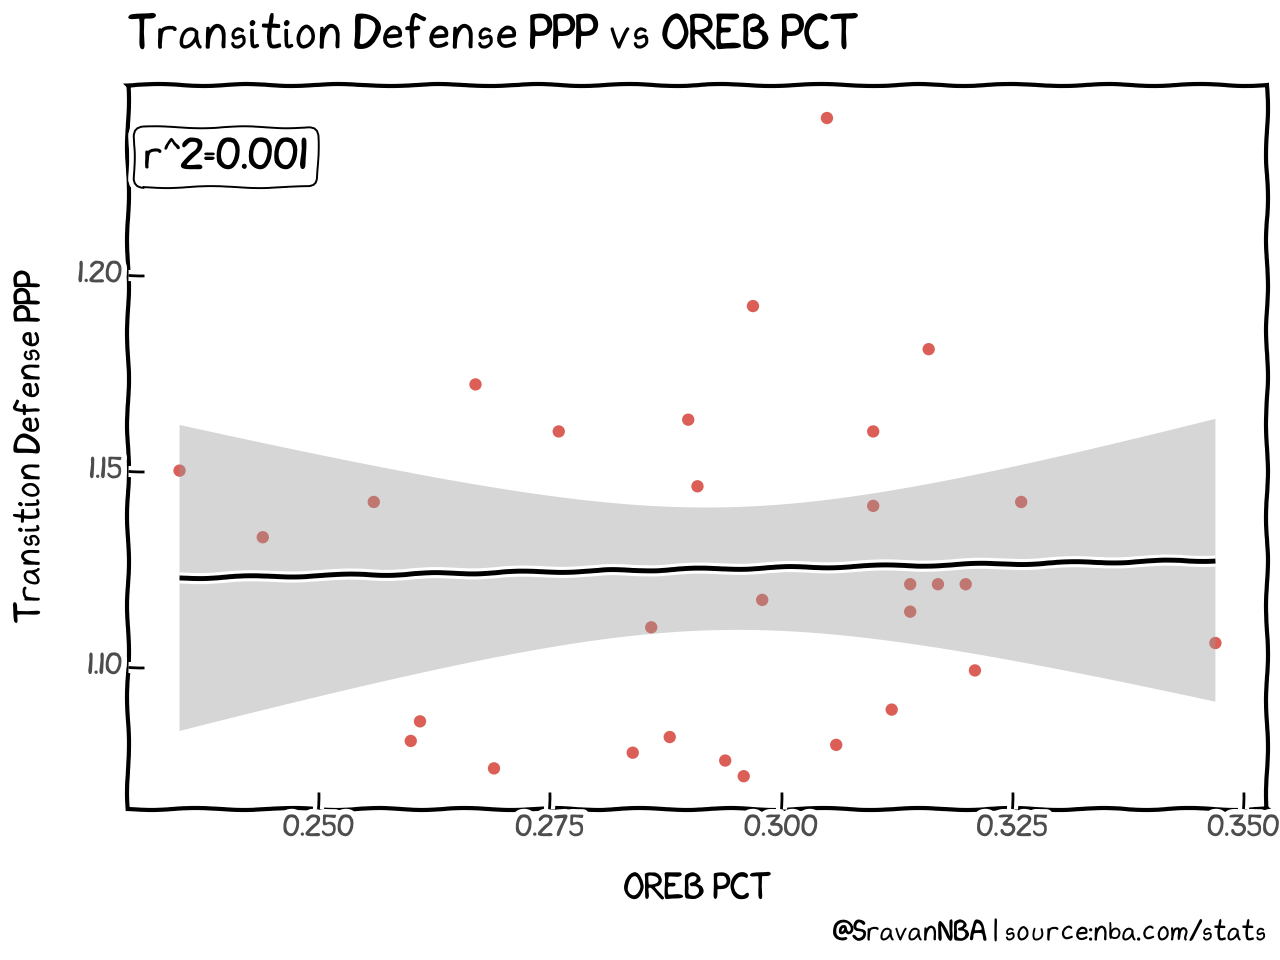

<Figure Size: (640 x 480)>

In [15]:
data = df5.copy()
x="OREB_PCT"
y="PPP"
r2 = (data[x].corr(data[y]))**2

p = (
    ggplot(data,aes(x=x,y=y,group=1))
    + geom_point(aes(color="Season"),show_legend=False)
    + geom_smooth(method="lm")
    + annotate('label', x=0.24, y=1.23, label=f'r^2={r2:0.3f}', size=14)
    + theme_idv
    + labs(
        title="Transition Defense PPP vs OREB PCT",
        y="Transition Defense PPP",
        x="OREB PCT",
        caption="@SravanNBA | source:nba.com/stats"
    )
)
p

In [42]:
df12,df22,df32 = [],[],[]
for year in range(2024,2025):
    stats = leaguedashteamstats.LeagueDashTeamStats(
        season=get_ss(year),
        measure_type_detailed_defense="Advanced",
        season_type_all_star="Regular Season",
    )
    df11 = stats.get_data_frames()[0]
    df12.append(df11)
    stats = leaguedashteamstats.LeagueDashTeamStats(
        season=get_ss(year),
        measure_type_detailed_defense="Defense",
        season_type_all_star="Regular Season",
        per_mode_detailed="Per100Possessions",
    )
    df21 = stats.get_data_frames()[0]
    df22.append(df21)
    stats = synergyplaytypes.SynergyPlayTypes(
        league_id="00",
        per_mode_simple="PerGame",
        season=get_ss(year),
        season_type_all_star="Regular Season",
        player_or_team_abbreviation="T",
        type_grouping_nullable="Defensive",
        play_type_nullable="Transition",

    )
    df31 = stats.get_data_frames()[0]
    df32.append(df31)

years = list(range(2024,2025))
dfa = []
for i,year in enumerate(years):
    dfc1 = pd.merge(df12[i],df22[i],on=["TEAM_ID","TEAM_NAME"])
    dfc2 = pd.merge(dfc1,df32[i],on=["TEAM_ID","TEAM_NAME"])
    dfc2["Season"] = year + 1
    dfa.append(dfc2)
df1 = pd.concat(dfa)

df5 = df1.copy()
df5["OPP_FB_PCT"] = df5["OPP_PTS_FB"]/df5["DEF_RATING_y"]
df5["Season"] = df5["Season"].astype("category")

df5["url"]= img_DIR_T + df5["TEAM_NAME"] + ".png"

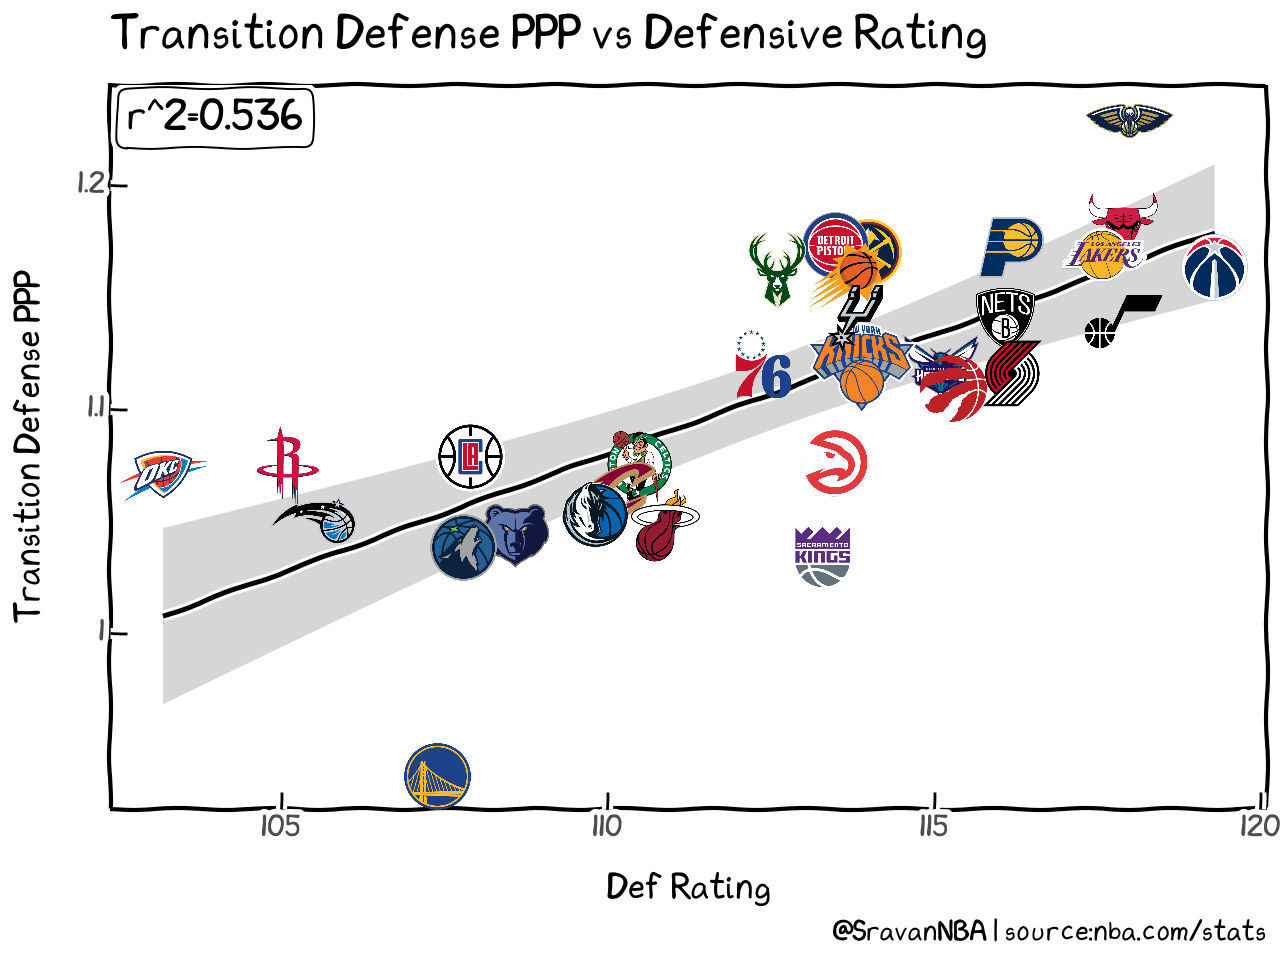

<Figure Size: (640 x 480)>

In [45]:
data = df5.copy()
x="DEF_RATING_x"
y="PPP"
r2 = (data[x].corr(data[y]))**2

p = (
    ggplot(data,aes(x=x,y=y,group=1))
    # + geom_point(aes(color="Season"),show_legend=False)
    + geom_smooth(method="lm")
    + geom_image(aes(image="url"),size=0.08)
    + annotate('label', x=104, y=1.23, label=f'r^2={r2:0.3f}', size=14)
    + theme_idv
    + labs(
        title="Transition Defense PPP vs Defensive Rating",
        y="Transition Defense PPP",
        x="Def Rating",
        caption="@SravanNBA | source:nba.com/stats"
    )
)
p